In [1]:
import trees
from fuzzingbook.GrammarFuzzer import display_tree, GrammarFuzzer
from fuzzingbook.GrammarCoverageFuzzer import GrammarCoverageFuzzer, duplicate_context
from fuzzingbook.Grammars import EXPR_GRAMMAR, extend_grammar
import random

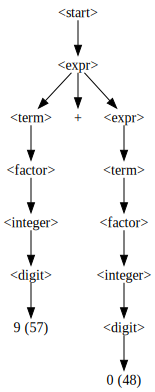

In [2]:
display_tree(trees.tree)

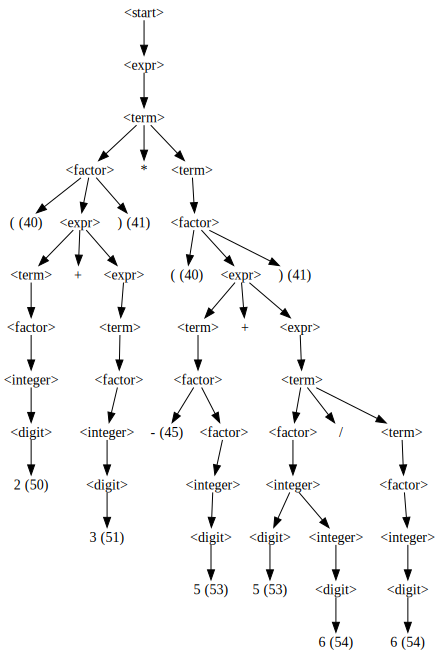

In [3]:
display_tree(trees.expr_tree_1)


In [4]:
def find_subtrees(tree, symbol):
    subtrees = []
    if tree[0] == symbol:
        subtrees.append(tree)
    if tree[1] is not None:
        for child in tree[1]:
            subtrees += find_subtrees(child,symbol)
    return subtrees

In [5]:
trees_list = find_subtrees(trees.tree, '<expr>')
trees_list

[('<expr>',
  [('<term>', [('<factor>', [('<integer>', [('<digit>', [('9', None)])])])]),
   (' + ', []),
   ('<expr>',
    [('<term>',
      [('<factor>', [('<integer>', [('<digit>', [('0', [])])])])])])]),
 ('<expr>',
  [('<term>', [('<factor>', [('<integer>', [('<digit>', [('0', [])])])])])])]

In [ ]:
def modified_tree(tree,old_subtree,new_subtree):
    if tree == old_subtree:
        tree = new_subtree
    elif tree[1] is not None:
        tree = (tree[0],[modified_tree(child,old_subtree,new_subtree) for child in tree[1]])
    return tree

def replace_random_subtree(tree, symbol, subtrees):
    to_replace = random.choice(find_subtrees(tree,symbol))
    replace_with = random.choice(subtrees)
    return modified_tree(tree,to_replace,replace_with)

In [ ]:
subtrees = find_subtrees(trees.tree,'<term>')
new_tree = replace_random_subtree(trees.expr_tree_1,'<term>',subtrees)
display_tree(new_tree)

In [ ]:
expr_fuzzer = GrammarCoverageFuzzer(EXPR_GRAMMAR)
expr_fuzzer.fuzz()

In [ ]:
expr_fuzzer.expansion_coverage()

In [ ]:
RE_GRAMMAR = {
'<start>': ['<alternative>', '^<alternative>', '<alternative>$',
'^<alternative>$'],
'<alternative>': ['<concat>', '<concat>|<alternative>'],
'<concat>': [''
, '<concat><regex>'],
'<regex>': ['<symbol>', '<symbol>*', '<symbol>+', '<symbol>?',
'<symbol>{<range>}'],
'<symbol>': ['.', '<char>', '(<alternative>)'],
'<char>': ['a', 'b', 'c'],
'<range>': ['<num>', ',<num>'],
'<num>': ['1', '2'],
}

In [21]:
dup_expr_grammar = extend_grammar(RE_GRAMMAR)
duplicate_context(dup_expr_grammar, "<start>")
dup_expr_grammar

{'<start>': ['<alternative-1>',
  '^<alternative-2>',
  '<alternative-3>$',
  '^<alternative-4>$'],
 '<alternative-1>': ['<concat-1>', '<concat-2>|<alternative-1>'],
 '<concat-1>': ['', '<concat-1><regex-1>'],
 '<regex-1>': ['<symbol-1>',
  '<symbol-2>*',
  '<symbol-3>+',
  '<symbol-4>?',
  '<symbol-5>{<range-1>}'],
 '<symbol-1>': ['.', '<char-1>', '(<alternative-1>)'],
 '<char-1>': ['a', 'b', 'c'],
 '<symbol-2>': ['.', '<char-2>', '(<alternative-1>)'],
 '<char-2>': ['a', 'b', 'c'],
 '<symbol-3>': ['.', '<char-3>', '(<alternative-1>)'],
 '<char-3>': ['a', 'b', 'c'],
 '<symbol-4>': ['.', '<char-4>', '(<alternative-1>)'],
 '<char-4>': ['a', 'b', 'c'],
 '<symbol-5>': ['.', '<char-5>', '(<alternative-1>)'],
 '<char-5>': ['a', 'b', 'c'],
 '<range-1>': ['<num-1>', ',<num-2>'],
 '<num-1>': ['1', '2'],
 '<num-2>': ['1', '2'],
 '<concat-2>': ['', '<concat-2><regex-2>'],
 '<regex-2>': ['<symbol-6>',
  '<symbol-7>*',
  '<symbol-8>+',
  '<symbol-9>?',
  '<symbol-10>{<range-2>}'],
 '<symbol-6>': ['

In [23]:
import json
# Specify the file path where you want to save the dictionary
file_path = "dup_expr_grammar.json"

# Write the dictionary to the file
with open(file_path, 'w') as json_file:
    json.dump(dup_expr_grammar, json_file)